# Polinomial regression model

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

$$y = \frac{1}{2} x^2 +\frac{3}{2} x +2 +\text{outliers}$$

In [2]:
X = 6 * np.random.rand(100,1)-3
y = 0.5*X**2 + 1.5*X + 2 + np.random.randn(100,1)

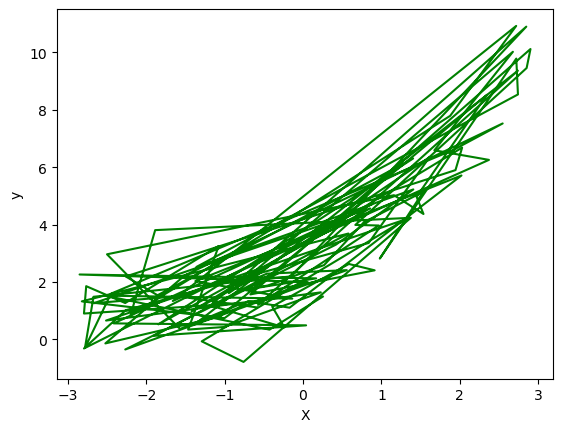

In [3]:
# quadratic equation is shown above

plt.plot(X, y, color = 'g')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

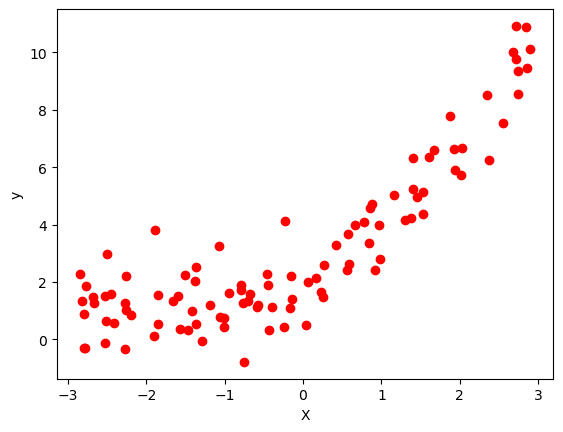

In [4]:
# quadratic equation is shown above

plt.scatter(X, y, color='r')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 1. Simple linear regression method
let's first do a simple linear regression modeling

In [6]:
## Apply linear regression
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()
regression1.fit(X_train, y_train)

LinearRegression()

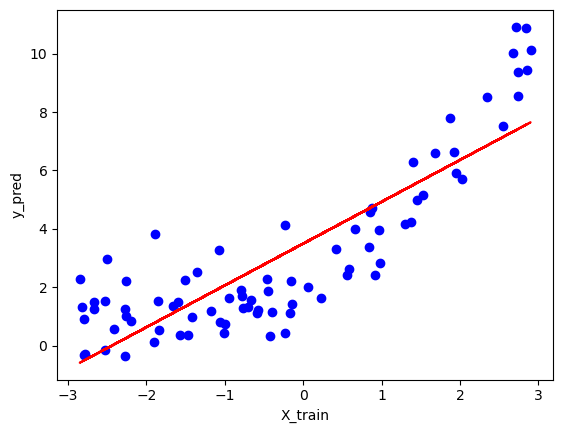

In [11]:
## plot Training data plot and best fit line

plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, regression1.predict(X_train), color = 'r')
plt.xlabel("X_train")
plt.ylabel("y_pred")
plt.show()

In [8]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression1.predict(X_test))
print(f"The r-squared value for the model is= {score}")

The r-squared value for the model is= 0.6405513731105184


which gives a bad fitting.``

### 2. Quadratic degree

$$y = \beta_0 +\beta_1 x +\beta_2 x^2$$

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [18]:

from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8726125379887142


In [20]:
print(f"Degree 1 polynomial fitting coefficient: {regression1.coef_}")
print(f"Degree 2 polynomial fitting coefficient: {regression.coef_}")

Degree 1 polynomial fitting coefficient: [[1.43280818]]
Degree 2 polynomial fitting coefficient: [[0.         1.47171982 0.42463995]]


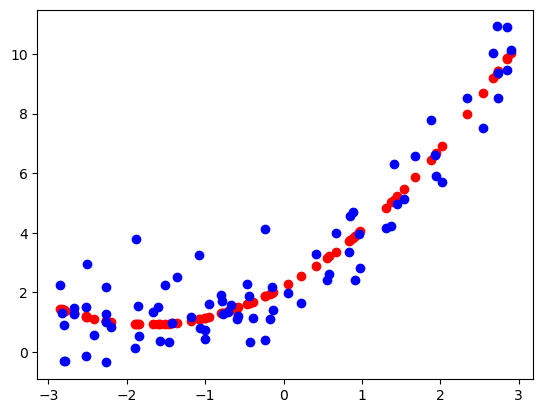

In [23]:
plt.scatter(X_train, regression.predict(X_train_poly), color="red")
plt.scatter(X_train, y_train, color="b")

### 3. Cubic

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [53]:

from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred1 = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.8620083765320085


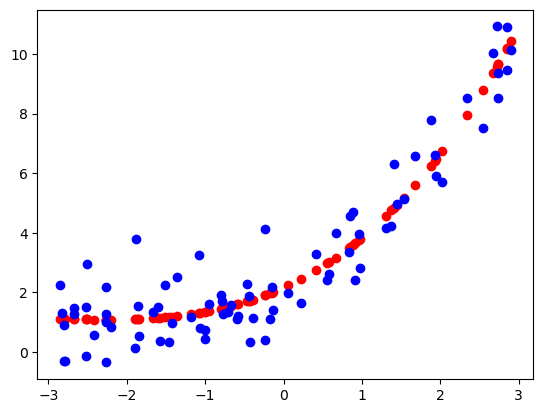

In [54]:
plt.scatter(X_train, regression.predict(X_train_poly), color="red")
plt.scatter(X_train, y_train, color="b")

In [55]:
## Prediction for new data 
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

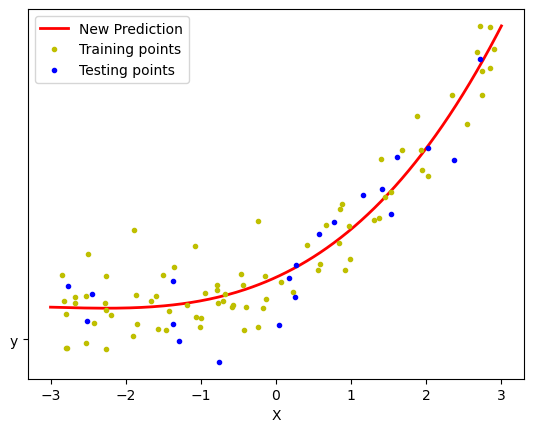

In [56]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "New Prediction")
plt.plot(X_train, y_train, "y.", label = "Training points")
plt.plot(X_test, y_test, "b.", label ="Testing points")
plt.xlabel("X")
plt.plot("y")
plt.legend()
plt.show()

# Pipeline Concepts

In [51]:
from sklearn.pipeline import Pipeline

In [60]:
def poly_regression(degree):
    """generic function, which accepts just degree and outputs the fitted polynomial"""
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)

    # Plotting prediction line
    plt.plot(X_new, y_pred_new, "r", label="Degree" + str(degree), linewidth=3)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

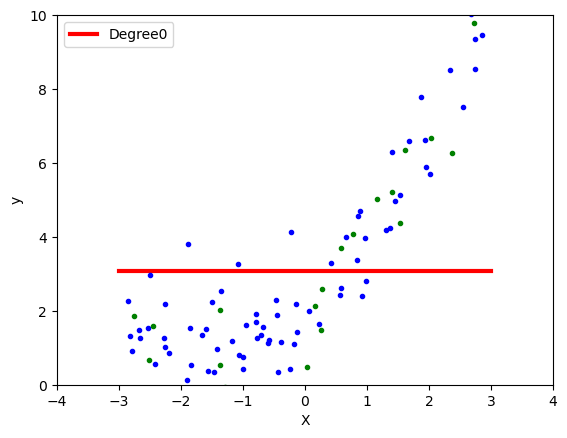

In [61]:
poly_regression(0)

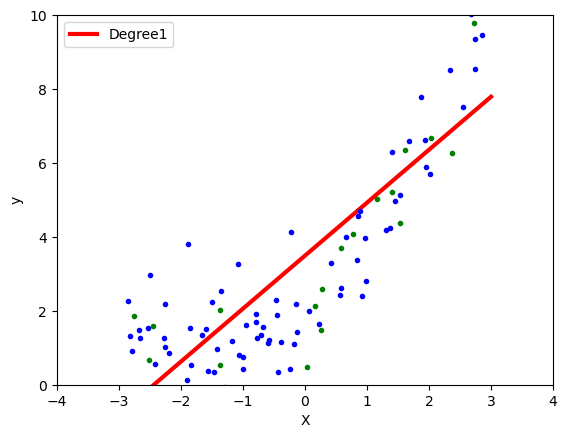

In [62]:
poly_regression(1)

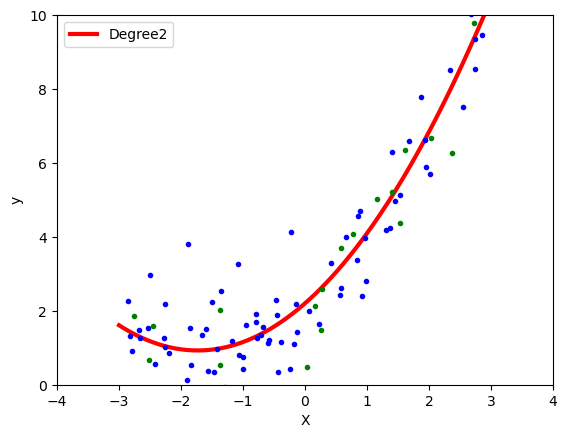

In [63]:
poly_regression(2)

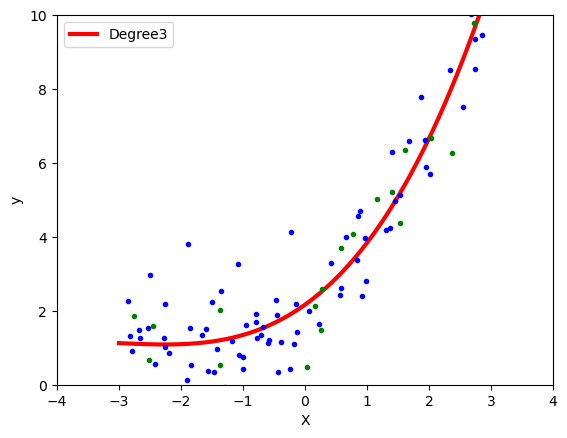

In [64]:
poly_regression(3)

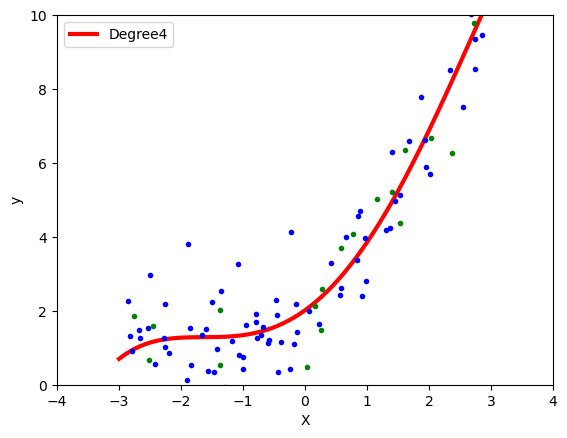

In [65]:
poly_regression(4)

**Which can also be done as follows:**

In [69]:
def poly_regression(degree, X_new):
    """Function to fit and predict polynomial of specified degree"""
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred_new = poly_regression.predict(X_new)
    return y_pred_new

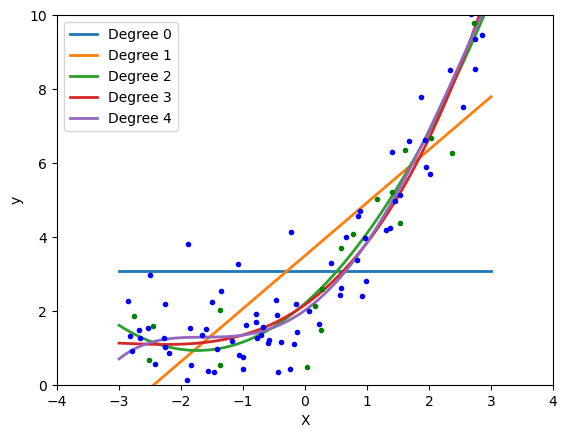

In [70]:
# Generate X_new once for all degrees
X_new = np.linspace(-3, 3, 200).reshape(200, 1)

# Plotting for degrees 0, 1, 2, 3, 4
for degree in range(5):
    y_pred = poly_regression(degree, X_new)
    plt.plot(X_new, y_pred, label="Degree " + str(degree), linewidth=2)

plt.legend(loc="upper left")
plt.plot(X_train, y_train, "b.", linewidth=3, label="Training Data")
plt.plot(X_test, y_test, "g.", linewidth=3, label="Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.axis([-4, 4, 0, 10])
plt.show()

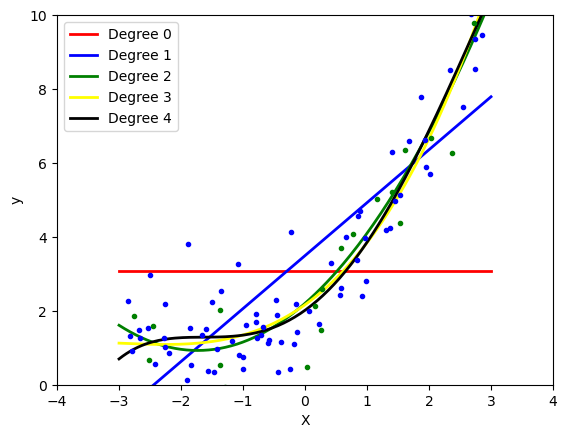

In [71]:
# Plotting for degrees 0, 1, 2, 3, 4 with different colors
colors = ['red', 'blue', 'green', 'yellow', 'black']

for degree, color in zip(range(5), colors):
    y_pred = poly_regression(degree, X_new)
    plt.plot(X_new, y_pred, label="Degree " + str(degree), linewidth=2, color=color)

plt.legend(loc="upper left")
plt.plot(X_train, y_train, "b.", linewidth=3, label="Training Data")
plt.plot(X_test, y_test, "g.", linewidth=3, label="Test Data")
plt.xlabel("X")
plt.ylabel("y")
plt.axis([-4, 4, 0, 10])
plt.show()